# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Juanwen Zhang
*   Your **student number**: 1002247017



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [ ]:
df

In [2]:
!pip install fast_ml --upgrade

     |████████████████████████████████| 42 kB 874 kB/s 


In [3]:
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_val, y_val, X_test, y_test = train_valid_test_split(df, target = 'Goal', train_size=0.7, valid_size=0.15, test_size=0.15, random_state=1)

In [4]:
df_copy = df
df_copy.drop(columns=df.columns[-1], axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
df_train_standard = pd.DataFrame(X_train_standard, columns = df_copy.columns)

X_val_standard = scalar.fit_transform(X_val)
df_val_standard = pd.DataFrame(X_val_standard, columns = df_copy.columns)

X_test_standard = scalar.fit_transform(X_test)
df_test_standard = pd.DataFrame(X_test_standard, columns = df_copy.columns)

In [6]:
list_1 = []
for i in range(0, 9625):
  list_1.append(1)

In [7]:
df_train_standard.insert(0, "1", list_1)
df_train_standard

,1,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1,-0.361085,-0.905784,-0.119488,-0.940131,-0.095678,0.859111,0.979557,0.668783,0.155395,-0.043433,-0.713007,-0.712206,-0.712217,-0.713547,-0.713615,-0.715038,-0.715034,-0.717146,-0.717155,-0.718326,-0.718338,-0.719920,-0.719890,-0.721419,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327
1,1,-0.994936,-1.369858,-1.799868,1.163469,1.079630,0.034484,-1.679894,-0.483242,0.381453,-0.043433,0.016710,0.014204,0.014219,0.012384,0.012416,0.010401,0.010340,0.007423,0.007438,0.004854,0.004869,0.146866,0.146805,0.578053,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,-2.981186,0.012816,-4.747804,0.011771,0.392746,0.577952
2,1,-1.125547,0.177055,-0.613717,-0.098691,0.603154,-0.583985,0.254252,-0.963252,-0.899543,1.931005,-0.275177,-0.276360,-0.276355,-0.277988,-0.277996,-0.279774,-0.279810,-0.282405,-0.282399,-0.284418,-0.284414,-0.286527,-0.286542,-0.288261,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.118020,-0.288234
3,1,1.482842,1.143876,0.803074,2.257341,-1.112161,0.034484,0.254252,-2.403282,-3.009417,-2.107618,0.016710,0.014204,0.014219,0.012384,0.012416,0.010401,0.010340,0.007423,0.007438,0.004854,0.004869,0.002401,0.002356,0.000510,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.118020,0.000495
4,1,1.014177,-0.751093,1.824481,-0.351123,-1.270987,-0.480907,0.254252,1.724805,1.210332,-0.761410,-0.567064,-0.566924,-0.566930,-0.568361,-0.568409,-0.569950,-0.569959,-0.572232,-0.572237,-0.573690,-0.573697,-0.575456,-0.575440,-0.721419,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,1.793977,0.011771,-1.139552,-0.721327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,1,-0.080655,0.293074,-0.448974,-0.351123,-0.349799,-0.687064,0.254252,0.572781,0.004689,-0.581916,-0.713007,-0.712206,-0.712217,-0.713547,-0.713615,-0.715038,-0.715034,-0.717146,-0.717155,-0.718326,-0.718338,-0.719920,-0.719890,-0.721419,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327
9621,1,0.948872,-0.171000,-0.910255,0.658605,-0.000383,0.652954,0.979557,0.188772,-0.447427,-2.107618,1.330199,1.321742,1.321805,1.319060,1.319273,1.316191,1.316012,1.311646,1.311705,1.306577,1.306642,1.302581,1.302399,1.299982,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,1.414277,1.299774
9622,1,0.107580,1.762642,1.593840,1.836621,0.094912,0.343719,-2.405199,-0.579244,-0.748837,-0.581916,0.454539,0.450050,0.450081,0.447943,0.448035,0.445664,0.445564,0.442164,0.442194,0.438761,0.438793,0.435795,0.435704,0.433667,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,0.392746,0.433588
9623,1,1.494367,0.911839,-1.371536,-0.855987,-1.588637,0.652954,1.221325,1.340797,-0.070663,-1.658882,-0.713007,-0.712206,-0.712217,-0.713547,-0.713615,-0.715038,-0.715034,-0.717146,-0.717155,-0.718326,-0.718338,-0.719920,-0.719890,-0.721419,0.197011,-0.010193,0.12607,0.0,0.150208,0.015572,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327


In [9]:
list_2 = []
for i in range(0, 2062):
  list_2.append(1)

In [ ]:
df_val_standard.insert(0, "1", list_2)
df_val_standard

In [11]:
list_3 = []
for i in range(0, 2063):
  list_3.append(1)

In [ ]:
df_test_standard.insert(0, "1", list_3)
df_test_standard

Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?

Everytime we train the dataset used up the entire training dataset, its called epoch. One epoch can contain multipe iterations. For each iteration, we update the weight. And the iteration is also called batch. For stochastics GD, we pass 1 sample in each iteration, and 1 epoch contains full training dataset. For each iteration, batch-size of anything between 1 sample and full samples are called mini-batch. But we would mostly to take multiple epochs to fully train the dataset.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy import linalg

In [14]:
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
W = np.dot(linalg.inv(np.dot(df_train_standard.T, df_train_standard)), np.dot(df_train_standard.T, y_train_df)) # Train the model using training set: finding weights
y_pred_train = np.dot(df_train_standard, W) # prediction on the training set
y_pred_valid = np.dot(df_val_standard, W) # prediction on the validation set
RMSE_train = sqrt(mean_squared_error(y_pred_train, y_train_df))
RMSE_valid = sqrt(mean_squared_error(y_pred_valid, y_val_df))
print ("RMSE on training set: " , RMSE_train)
print ("RMSE on validation set: " , RMSE_valid)

RMSE on training set:  0.0001764688919173236
RMSE on validation set:  0.00017415621546655632


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [15]:
w = (np.random.random(41)).reshape(1,-1)/1000

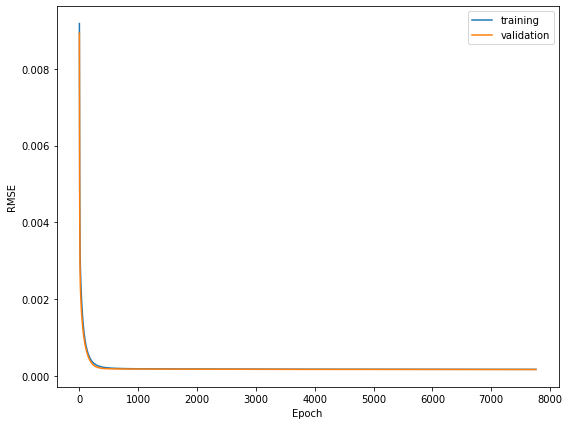

--- Total Training Time: 71.57836556434631 (s) ---


In [16]:
import time
start_time = time.time() 

lr = 0.01 
rmse_train_array = []
rmse_val_array = []
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
RMSE_GD_val = 2
while RMSE_GD_val > 1.001 * RMSE_valid:
  y_gd_train = np.dot(df_train_standard,w.T).reshape(-1,1)
  y_gd_val = np.dot(df_val_standard,w.T).reshape (-1,1)
  RMSE_GD_train = sqrt(mean_squared_error(y_gd_train, y_train_df))
  RMSE_GD_val = sqrt(mean_squared_error(y_gd_val, y_val_df))
  rmse_train_array.append(RMSE_GD_train)
  rmse_val_array.append(RMSE_GD_val)
  gradient = (1/len(y_gd_train) * np.dot(df_train_standard.T, y_gd_train - y_train_df)).reshape(1,-1)
  w = w - lr * gradient ### weight update
fig = plt.figure(figsize=(9,7))
plt.plot(rmse_train_array, label = "training")
plt.plot(rmse_val_array, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

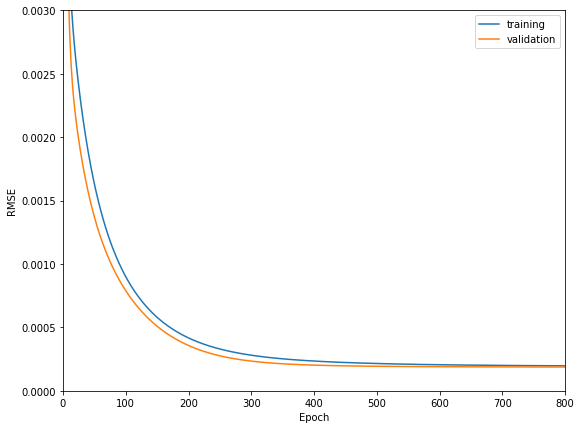

In [20]:
# take a closer look at the plot to see difference of training and validation RMSE
fig = plt.figure(figsize=(9,7))
plt.plot(rmse_train_array, label = "training")
plt.plot(rmse_val_array, label = "validation")
plt.xlim([0, 800])
plt.ylim([0, 0.003])
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Since the training RMSE and validation RMSE mostly overlap, it can be concluded that there is no overfitting or underfitting for the full batch gradient decent model. 


## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [16]:
 w = (np.random.random(41)).reshape(1,-1)/1000

In [17]:
# function to implement batch gradient descent
def minibatchGradientDescent(X_train, Y_train, X_val, Y_val, b_size, lr, CT):

  import time
  updated_timeused_eachepoch = 0
  rmse_train_list = []
  rmse_val_list = []
  time_array = []
  RMSE_fullepoch_val = 2
  w_copy = w

  while RMSE_fullepoch_val > CT :
    start_time = time.time() ## Records current time
    shuffled_data = np.random.permutation(np.hstack((X_train,Y_train)))
    X = shuffled_data[:,:-1]
    Y = shuffled_data[:,-1]

    for start in range(0, len(X), b_size): #step is the batch size
      X_batch = X[start:start + b_size, :]     
      Y_batch = Y[start:start + b_size]
      Y_batch_df = pd.DataFrame(Y_batch)
      y_predict_train = np.dot(X_batch,w_copy.T).reshape(-1,1) 
      gradient = (1/len(y_predict_train) * np.dot(X_batch.T, y_predict_train - Y_batch_df)).reshape(1,-1)
      w_copy = w_copy - lr * gradient   #update
    
      # reach the end of epoch, then produce RMSE
    y_train_fullepoch = np.dot(X_train, w_copy.T).reshape(-1,1) 
    RMSE_fullepoch_train = sqrt(mean_squared_error(y_train_fullepoch, Y_train))
    y_val_fullepoch = np.dot(X_val, w_copy.T).reshape(-1,1) 
    RMSE_fullepoch_val = sqrt(mean_squared_error(y_val_fullepoch, Y_val))
    
    rmse_train_list.append(RMSE_fullepoch_train)
    rmse_val_list.append(RMSE_fullepoch_val)
    timeused_eachepoch = time.time() - start_time
    updated_timeused_eachepoch += timeused_eachepoch
    time_array.append(updated_timeused_eachepoch)
      
  return w_copy, rmse_train_list, rmse_val_list, time_array

In [18]:
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
w_trained_list = []
rmse_t_list_allb = []
rmse_v_list_allb = []
time_record_allb = []
b_list =[128, 256, 512, 1024]
for b in b_list:
  w_trained, rmse_t_list, rmse_v_list, time_record= minibatchGradientDescent(X_train=df_train_standard, Y_train=y_train_df, 
                                                  X_val=df_val_standard, Y_val= y_val_df,
                                                  b_size = b, lr = 0.01, CT = 1.001* RMSE_valid)
  
  w_trained_list.append(w_trained)
  rmse_t_list_allb.append(rmse_t_list)
  rmse_v_list_allb.append(rmse_v_list)
  time_record_allb.append(time_record)

print(rmse_v_list_allb[1])

[0.0016609053926498183, 0.0011339235118682886, 0.0008493169222321669, 0.0006613295802721183, 0.0005333404090285338, 0.0004502232922412007, 0.00038887504608076513, 0.00034907833970005477, 0.00031825766120286336, 0.0002990100001763167, 0.0002821268710391658, 0.000269983180649316, 0.00026080728781017223, 0.0002538364743402068, 0.00024828040256243854, 0.00024448859828522383, 0.00024017497003673993, 0.00023698773155453578, 0.00023428577215054273, 0.0002317998124935573, 0.00023069564874458285, 0.00022787999865782037, 0.000226230863954237, 0.0002247464946428599, 0.00022327845422751954, 0.0002221478196060072, 0.00022076847469983636, 0.0002195800287408038, 0.00021848366405303262, 0.00021746169452642743, 0.00021684040481621545, 0.00021547916780450367, 0.00021467025334992557, 0.00021404042746115494, 0.0002129676893675946, 0.00021193146631519382, 0.00021117602760421824, 0.00021031235614389857, 0.00021008704961330882, 0.0002091621428496353, 0.000208031495150595, 0.00020747766213007255, 0.0002068574

In [ ]:
rmse_v_list_allb[0]

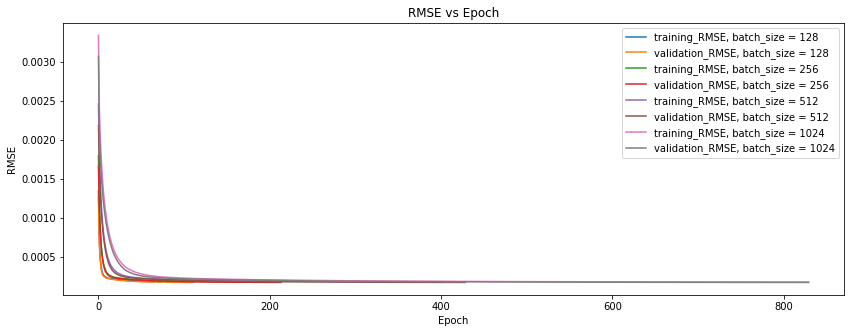

In [19]:
fig = plt.figure(figsize=(14,5))
epoch_list = []

for m in range(0, len(b_list)):
  plt.plot(rmse_t_list_allb[m],label='training_RMSE, batch_size = %d' %b_list[m])
  plt.plot(rmse_v_list_allb[m],label='validation_RMSE, batch_size = %d' %b_list[m])
plt.title("RMSE vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

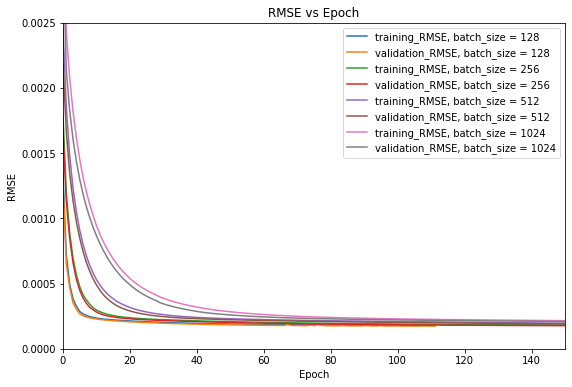

In [23]:
# take a close look at the RMSE of each batch size
fig = plt.figure(figsize=(9,6))
epoch_list = []

for m in range(0, len(b_list)):
  plt.plot(rmse_t_list_allb[m],label='training_RMSE, batch_size = %d' %b_list[m])
  plt.plot(rmse_v_list_allb[m],label='validation_RMSE, batch_size = %d' %b_list[m])
plt.title("RMSE vs Epoch")
plt.xlabel("Epoch")
plt.xlim([0, 150])
plt.ylim([0, 0.0025])
plt.ylabel("RMSE")
plt.legend()
plt.show()

Batch size larger than 64 will definely have a convergence RMSE. Based on the plot, there are no big differences among training and validation errors of different batch sizes. In terms of the performance, RMSE of smaller batch sizes converge faster. And bigger batch sizes require more in number of epoch to train the weight to be closer to the threshold.

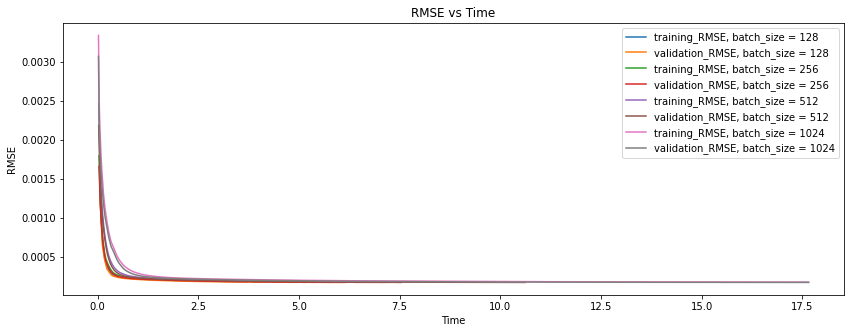

In [27]:
fig = plt.figure(figsize=(14,5))

for m in range(0, len(b_list)):
  plt.plot(time_record_allb[m], rmse_t_list_allb[m],label= 'training_RMSE, batch_size = %d' %b_list[m])
  plt.plot(time_record_allb[m], rmse_v_list_allb[m],label='validation_RMSE, batch_size = %d' %b_list[m])
plt.title("RMSE vs Time")
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.legend()
plt.show()

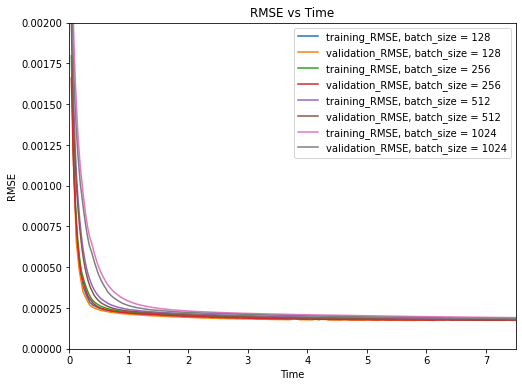

In [29]:
# take a closer look at the RMSE VS Time
fig = plt.figure(figsize=(8,6))

for m in range(0, len(b_list)):
  plt.plot(time_record_allb[m], rmse_t_list_allb[m],label= 'training_RMSE, batch_size = %d' %b_list[m])
  plt.plot(time_record_allb[m], rmse_v_list_allb[m],label='validation_RMSE, batch_size = %d' %b_list[m])
plt.title("RMSE vs Time")
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.xlim([0, 7.5])
plt.ylim([0, 0.002])
plt.legend()
plt.show()

RMSE of smaller batch sizes converge faster. And bigger batch sizes require longer time to train the weight to be closed to the threshold.

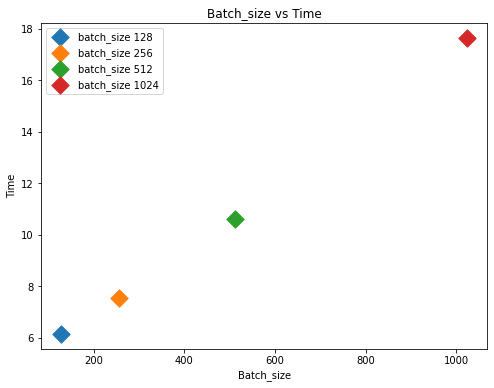

In [30]:
fig = plt.figure(figsize=(8,6))

for i in range(0, len(b_list)):
  plt.scatter(b_list[i], time_record_allb[i][-1], marker="D", s=150, label ='batch_size %d' %b_list[i])
plt.title("Batch_size vs Time")
plt.xlabel("Batch_size")
plt.ylabel("Time")
plt.legend()
plt.show()

There is a trend in batch size vs time. In other words, larger batch sizes require longer time to train the model.

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [32]:
def momentum_GD(X_train, Y_train, X_val, Y_val, b_size, beta, lr, CT):

  import time
  updated_timeused_eachepoch = 0
  rmse_train_mo_list = []
  rmse_val_mo_list = []
  time_array = []
  RMSE_fullepoch_val_mo = 2
  last_g = 0
  w_mom = w

  while RMSE_fullepoch_val_mo > CT :
    start_time = time.time()
    shuffled_data = np.random.permutation(np.hstack((X_train,Y_train))) # shuffle the training data
    X = shuffled_data[:,:-1]
    Y = shuffled_data[:,-1]

    for start in range(0, len(X), b_size): #step is the batch size
      X_batch = X[start:start + b_size, :]     
      Y_batch = Y[start:start + b_size]
      Y_batch_df = pd.DataFrame(Y_batch)
      y_predict_train = np.dot(X_batch,w_mom.T).reshape(-1,1) 
      gradient = (1/len(y_predict_train) * np.dot(X_batch.T, y_predict_train - Y_batch_df)).reshape(1,-1)
      g_momentum = beta*last_g + (1-beta)*gradient # momentum gradient
      last_g = g_momentum
      w_mom = w_mom - lr * g_momentum   #update
    
    # once reach the end of epoch, produce RMSE
    ypre_train_mo = np.dot(X_train, w_mom.T).reshape(-1,1) 
    RMSE_fullepoch_train_mo = sqrt(mean_squared_error(ypre_train_mo, Y_train))
    yval_train_mo = np.dot(X_val, w_mom.T).reshape(-1,1) 
    RMSE_fullepoch_val_mo = sqrt(mean_squared_error(yval_train_mo, Y_val))
    
    rmse_train_mo_list.append(RMSE_fullepoch_train_mo)
    rmse_val_mo_list.append(RMSE_fullepoch_val_mo)
    timeused_eachepoch = time.time() - start_time
    updated_timeused_eachepoch += timeused_eachepoch
    time_array.append(updated_timeused_eachepoch)
      
  return w_mom, rmse_train_mo_list, rmse_val_mo_list, time_array

In [33]:
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
w_trained_list = []
rmse_train_mom_all = []
rmse_val_mom_all = []
time_record_mom = []
beta_list =[0.2, 0.4, 0.6, 0.8]
for be in beta_list:
  w_trained, rmse_train_mo_list, rmse_val_mo_list, time_record= momentum_GD(X_train=df_train_standard, Y_train=y_train_df, 
                                                  X_val=df_val_standard, Y_val= y_val_df,
                                                  b_size = 128, beta = be, lr = 0.01, CT = 1.001* RMSE_valid)
  w_trained_list.append(w_trained)
  rmse_train_mom_all.append(rmse_train_mo_list)
  rmse_val_mom_all.append(rmse_val_mo_list)
  time_record_mom.append(time_record)

print(rmse_train_mom_all)

[[0.0012715160255499, 0.0007070130305389461, 0.00047813383385068555, 0.0003641129751471998, 0.0003119896187426063, 0.000282146593295212, 0.00026449582090798466, 0.00025292751344083587, 0.00024615902883953913, 0.00023936311175095103, 0.00023518741617039858, 0.00023124750970554325, 0.00022827967104121962, 0.0002260665961812591, 0.00022383731900102647, 0.0002217861085810286, 0.0002213999953880965, 0.0002181231533837114, 0.00021648913425575015, 0.00021541607650217863, 0.00021414942812279065, 0.00021763688107118986, 0.00021103330692279353, 0.00020965136615785923, 0.0002084395827610216, 0.00020746845043402874, 0.00020683925200286907, 0.00020498911301930955, 0.00020420148372524765, 0.00020304088848492434, 0.00020203932458903043, 0.00020114302448017435, 0.00020025825647283131, 0.00019988695205282173, 0.0001986810664130296, 0.0001995238684832899, 0.00019790483086091907, 0.00019648737086644676, 0.00019633769846372182, 0.00019510207751404412, 0.00019442634797647474, 0.00019384348706550524, 0.0001

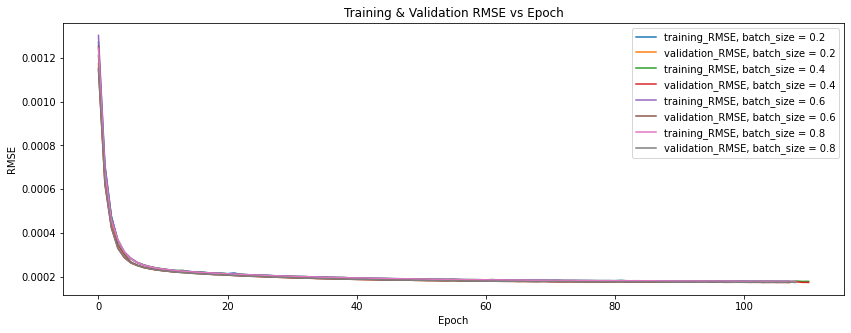

In [34]:
beta_list =[0.2, 0.4, 0.6, 0.8]
fig = plt.figure(figsize=(14,5))
for b in range(0, len(beta_list)):
  plt.plot(rmse_train_mom_all[b], label= 'training_RMSE, batch_size = %.1f' %beta_list[b])
  plt.plot(rmse_val_mom_all[b], label = 'validation_RMSE, batch_size = %.1f' %beta_list[b])
plt.title("Training & Validation RMSE vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

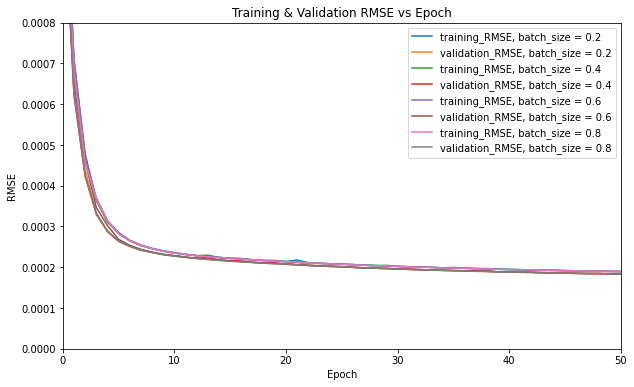

In [35]:
# take a closer look at the plot
fig = plt.figure(figsize=(10, 6))
for b in range(0, len(beta_list)):
  plt.plot(rmse_train_mom_all[b], label= 'training_RMSE, batch_size = %.1f' %beta_list[b])
  plt.plot(rmse_val_mom_all[b], label = 'validation_RMSE, batch_size = %.1f' %beta_list[b])
plt.title("Training & Validation RMSE vs Epoch")
plt.xlim([0, 50])
plt.ylim([0, 0.0008])
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

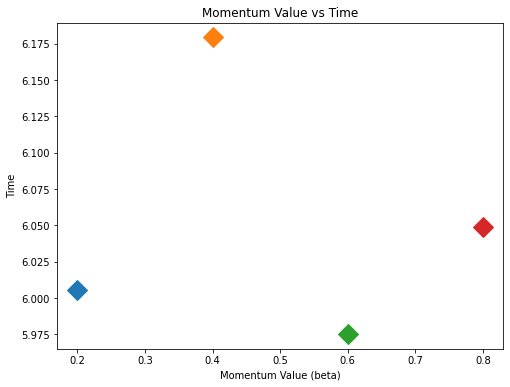

In [36]:
fig = plt.figure(figsize=(8,6))

for k in range(0, len(beta_list)):
  plt.scatter(beta_list[k], time_record_mom[k][-1], marker="D", s=200, label ='Momentum_value = %.1f' %beta_list[k])
plt.title("Momentum Value vs Time")
plt.xlabel("Momentum Value (beta)")
plt.ylabel("Time")
plt.show()

From the plot, momentum helps the RMSE converge faster. Lines of different momentum value basically have the same RMSE throughout the time. However, there is no relationship between momentum values and training time.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [37]:
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
w_trained_list = []
rmse_t_list_6 = []
rmse_v_list_6 = []
time_record_6 = []


w_trained_6, rmse_t_list_6, rmse_v_list_6, time_record_6 = minibatchGradientDescent(X_train=df_train_standard, Y_train=y_train_df, 
                                                  X_val=df_val_standard, Y_val= y_val_df,
                                                  b_size = 128, lr = 0.01, CT = 1.001* RMSE_valid)
  
w_trained_list.append(w_trained_6)
rmse_t_list_6.append(rmse_t_list_6)
rmse_v_list_6.append(rmse_v_list_6)
time_record_6.append(time_record_6)

I selected the model of mini-batch gradient decent with batch size of 128 since it converged fastest and used shortest training time in part 4. And the threshold is the same of part 3, learning rate is 0.01.

In [38]:
ypre_train_6 = np.dot(df_train_standard,w_trained_6.T).reshape(-1,1)
ypre_val_6 = np.dot(df_val_standard,w_trained_6.T).reshape (-1,1)
RMSE_train_6 = sqrt(mean_squared_error(ypre_train_6, y_train_df))
RMSE_val_6 = sqrt(mean_squared_error(ypre_val_6, y_val_df))
print(RMSE_train_6)
print(RMSE_val_6)

0.00017918947099806895
0.00017425744877286596


In [39]:
# test the model performance on the test dataset
y_test_df = pd.DataFrame(y_test)
ypre_test_6 = np.dot(df_test_standard,w_trained_6.T).reshape(-1,1)
RMSE_test_6 = sqrt(mean_squared_error(ypre_test_6, y_test_df))
print(RMSE_test_6)

0.000170253940666048


The RMSE on the testing set is small enough to conclude that the model performs well on the task of managing ailerons of aircraft. The prediction values will do a good job compare to the "Goal" column.